In [186]:
import netCDF4
import itertools

from tqdm import tqdm

Nx = 512
Ny = 512
Nz = 601
Na = 3
Ns = Nx * Ny
#Ns = 8

In [187]:
#mu_id = ['10', '8', '6', '4', '2']
mu_id = ['10', '6', '2']

T_full_ssd = np.zeros((Na, Nz, Ny * Nx))
t_full_ssd = np.zeros((Na, Nz, Ny * Nx))

T_full_300 = np.zeros((Na, Nz, Ny * Nx))
t_full_300 = np.zeros((Na, Nz, Ny * Nx))

T_ssd = np.zeros((Na, Nz, Ns))
t_ssd = np.zeros((Na, Nz, Ns))

T_300 = np.zeros((Na, Nz, Ns))
t_300 = np.zeros((Na, Nz, Ns))

In [189]:
def remove_negatives(t, T, mu_id):

    for i in range(Nx * Ny):

        if mu_id == '6' and (np.any(T[:, i] < 0.0) or T[len(T[:, 0]) - 1, i] < 5500.0 or T[len(T[:, 0]) - 1, i] > 11000.0):
            
            t[:, i] = t[:, i - 1]
            T[:, i] = T[:, i - 1]

    return t, T

for i in tqdm(range(Na)):

    t_full_ssd[i, :, :] = np.array(netCDF4.Dataset('./ssd/222809/' + mu_id[i] + '/taugrid.222809.nc.1')['tau']).reshape(Nz, Ny * Nx)
    T_full_ssd[i, :, :] = np.array(netCDF4.Dataset('./ssd/222809/' + mu_id[i] + '/T_onTau.222809.nc.1')['T']).reshape(Nz, Ny * Nx)

    t_full_300[i, :, :] = np.array(netCDF4.Dataset('./300G/627321/' + mu_id[i] + '/taugrid.627321.nc.1')['tau']).reshape(Nz, Ny * Nx)
    T_full_300[i, :, :] = np.array(netCDF4.Dataset('./300G/627321/' + mu_id[i] + '/T_onTau.627321.nc.1')['T']).reshape(Nz, Ny * Nx)
    
    if i == 1: t_full_300[i, :, :], T_full_300[i, :, :] = remove_negatives(t_full_300[i, :, :], T_full_300[i, :, :], mu_id[i])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:19<00:00,  6.43s/it]


In [190]:
def build_sample(init_sample, t, mu_id, cube):
    
    tau_threshold = 1e-11
    
    final_sample = np.zeros(Ns)
    
    k = 0
    
    for idx in init_sample:
        
        if t[0, idx] > tau_threshold:
                
            final_sample[k] = idx
            
            k += 1
            
            if k >= int(Ns / 2) and not np.any(final_sample[: int(Ns / 2)] == 0): break

    k = 0
                
    for idx in init_sample:
            
        if t[0, idx] < tau_threshold:
                
            idx_final = idx
                
        else:
                
            idx_final = idx
                
            while t[0, idx_final] >= tau_threshold or np.any((init_sample - idx_final) == 0):
                
                idx_final += np.random.choice(np.arange(-idx_final, Nx * Ny - idx_final, 1), 1)[0]
                
#                if mu_id == '2' and cube == '300G':
                    
#                    print(idx_final, ' ', t[0, idx_final])
            
        final_sample[int(Ns / 2) + k] = idx_final
        
        k += 1
        
        if k >= int(Ns / 2): break
        
    return final_sample.astype(int)

for i in tqdm(range(Na)):
    
    init_sample = np.random.choice(Nx * Ny, Ns, replace = False)
    
    if Ns <  Nx * Ny: sample = build_sample(init_sample, t_full_ssd[i, :, :], mu_id[i], 'ssd')
    if Ns == Nx * Ny: sample = init_sample
    
#    print('ssd')
    
#    print(init_sample)
    
#    print(sample)
    
    t_ssd[i, :, :] = t_full_ssd[i, :, sample].T
    T_ssd[i, :, :] = T_full_ssd[i, :, sample].T
    
    init_sample = np.random.choice(Nx * Ny, Ns, replace = False)
    
    if Ns <  Nx * Ny: sample = build_sample(init_sample, t_full_300[i, :, :], mu_id[i], '300G')
    if Ns == Nx * Ny: sample = init_sample
    
#    if mu_id[i] == '2':
    
#        print('300G')
    
#        print(init_sample)
    
#        print(sample)
    
    t_300[i, :, :] = t_full_300[i, :, sample].T
    T_300[i, :, :] = T_full_300[i, :, sample].T

if Ns <  Nx * Ny: np.savez('intro_img_2_sample_8', t_ssd = t_ssd, t_300 = t_300, T_ssd = T_ssd, T_300 = T_300)
if Ns == Nx * Ny: np.savez('intro_img_2',          t_ssd = t_ssd, t_300 = t_300, T_ssd = T_ssd, T_300 = T_300)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:29<00:00, 29.75s/it]


In [179]:
t = np.array(netCDF4.Dataset('./300G/627321/6/taugrid.627321.nc.1')['tau']).reshape(Nz, Ny * Nx)
T = np.array(netCDF4.Dataset('./300G/627321/6/T_onTau.627321.nc.1')['T']).reshape(Nz, Ny * Nx)

In [182]:
t[100, 0]

19.957218

In [183]:
mi = 501

for i in range(Nx * Ny):

#    if T[len(T[:, 0]) - mi, i] > 11000 or T[len(T[:, 0]) - mi, i] < 5500:
    if T[len(T[:, 0]) - mi, i] > 11000:

        print(i, ' ', T[len(T[:, 0]) - mi, i])

52012   11358.208
52013   13329.552
246899   12554.08
247879   11378.285
248904   12059.099
248905   12614.311
250944   11633.837
257102   12765.398


In [139]:
T = np.array(netCDF4.Dataset('./300G/627321/10/T_onTau.627321.nc.1')['T']).reshape(Nz, Ny * Nx)

In [140]:
for i in range(Nx * Ny):

    if T[len(T[:, 0]) - 1, i] > 11000 or T[len(T[:, 0]) - 1, i] < 5500:

        print(i, ' ', T[len(T[:, 0]) - 1, i])

In [142]:
T = np.array(netCDF4.Dataset('./300G/627321/10/T_onTau.627321.nc.1')['T']).reshape(Nz, Ny * Nx)

In [143]:
for i in range(Nx * Ny):

    if T[len(T[:, 0]) - 1, i] > 11000 or T[len(T[:, 0]) - 1, i] < 5500:

        print(i, ' ', T[len(T[:, 0]) - 1, i])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65536/65536 [00:51<00:00, 1261.67it/s]


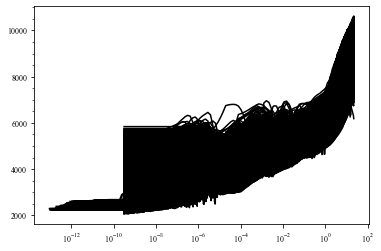

In [113]:
#T = remove_negatives(T)

import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator

from tqdm import tqdm

plt.close('all')

fig, ax = plt.subplots(ncols = 1, nrows = 1)

#for i in tqdm(np.random.choice(Nx * Ny, 32, replace = False)):
for i in tqdm(np.random.choice(Nx * Ny, 65536, replace = False)):

    ax.plot(t[:, i], T[:, i], color = 'k')

ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    
#plt.plot(t[:, 0], T[:, 0])

ax.set_xscale('log')

plt.savefig('test_sample.pdf')
    
plt.show()

In [67]:
print('reading t_ssd...')
t_ssd = np.load('intro_img_2.npz')['t_ssd']
print('reading t_300...')
t_300 = np.load('intro_img_2.npz')['t_300']
print('reading T_ssd...')
T_ssd = np.load('intro_img_2.npz')['T_ssd']
print('reading T_300...')
T_300 = np.load('intro_img_2.npz')['T_300']

reading t_ssd...
reading t_300...
reading T_ssd...
reading T_300...


In [107]:
print('reading t_ssd...')
t_ssd = np.load('intro_img_2_sample_8.npz')['t_ssd']
print('reading t_300...')
t_300 = np.load('intro_img_2_sample_8.npz')['t_300']
print('reading T_ssd...')
T_ssd = np.load('intro_img_2_sample_8.npz')['T_ssd']
print('reading T_300...')
T_300 = np.load('intro_img_2_sample_8.npz')['T_300']

reading t_ssd...
reading t_300...
reading T_ssd...
reading T_300...


In [191]:
import itertools

from scipy import interpolate

import sys

def find_interpol_range(tau, Nz, Ns):

    thick = 1e+20
    thinn = 1e-20

    for k in range(Ns):

        opt_thick_end = tau[Nz - 1, k]
        opt_thinn_end = tau[0, k]

        if opt_thinn_end > thinn: thinn = opt_thinn_end
        
        if opt_thick_end < thick: thick = opt_thick_end
    
    return np.log10(thinn), np.log10(thick)

def find_shortest_delta(tau, Nz, Ns):
    
    tau_1d = np.log10(tau.T).reshape(Nz * Ns)
    
    delta = np.abs(np.diff(tau_1d))
    
    idx_min = np.argmin(np.abs(delta - 0.001))
    
#    delta = 20
    
#    for j, k in tqdm(itertools.product(range(Nz - 1), range(Ns)), desc = str(i) + ', ' + cube + ', find shortest delta'):
        
#        d = np.abs(np.log10(tau[j + 1, k]) - np.log10(tau[j, k]))
        
#        if d < delta and d > 0.001: delta = d

#    print(delta[idx_min])

    #print(np.min(np.abs(delta - 0.001)))
    
#    sys.exit()
            
    return delta[idx_min]

def const_interpol_grid(thin, thick, delta):
    
    Ng = int(np.floor(np.abs(thick - thin) / delta))
    
    grid = np.zeros(Ng)
    
    grid[0] = thin
    
    for i in range(Ng - 1): grid[i + 1] = grid[i] + delta
    
    return grid

def interpol_and_average(i, cube, tau, T, igrid, Ns, up, lp):
    
    Ti = np.zeros((Ns, len(igrid)), dtype = np.float32)
    
    T_mean = np.zeros(len(igrid))
    
    T_up = np.zeros((len(up), len(igrid)))
    T_lp = np.zeros((len(lp), len(igrid)))
    
    for k in tqdm(range(Ns), desc = str(i) + ', ' + cube + ', interpolating'):
    
        f = interpolate.interp1d(np.log10(tau[:, k]), T[:, k])
        
        Ti[k, :] = f(igrid)

    print(str(i) + ', ' + cube + ', averaging...')

    T_mean = np.mean(Ti, axis = 0)
    
    for m, j in tqdm(itertools.product(range(len(up)), range(len(igrid))), desc = str(i) + ', ' + cube + ', calculating percentiles'):

        T_lp[m, j] = np.percentile(Ti[:, j], lp[m])
        T_up[m, j] = np.percentile(Ti[:, j], up[m])

    return T_lp, T_mean, T_up

lp = np.array([0,   1,  5,  10, 25])
up = np.array([100, 99, 95, 90, 75])

grid_ssd = np.ones((Na, 110000)) * np.nan
grid_300 = np.ones((Na, 110000)) * np.nan

T_mean_ssd = np.ones((Na, 110000)) * np.nan
T_mean_300 = np.ones((Na, 110000)) * np.nan

T_lp_ssd = np.ones((Na, len(lp), 110000)) * np.nan
T_lp_300 = np.ones((Na, len(lp), 110000)) * np.nan

T_up_ssd = np.ones((Na, len(up), 110000)) * np.nan
T_up_300 = np.ones((Na, len(up), 110000)) * np.nan

In [192]:
for i in range(Na):
    
    print('SSD:')
    
    print('finding interpolation range...')
    thin, thick =        find_interpol_range(t_ssd[i, :, :], Nz, Ns)
    
    print('finding shortest delta...')
    delta =              find_shortest_delta(t_ssd[i, :, :], Nz, Ns)
    
    print('constructing interpolation grid...')
    grid =               const_interpol_grid(thin, thick, delta)
    
    T_lp, T_mean, T_up = interpol_and_average(i, 'ssd', t_ssd[i, :, :], T_ssd[i, :, :], grid, Ns, up, lp)
    
    grid_ssd[i, : len(grid)] = 10.0**grid
    
    T_mean_ssd[i, : len(T_mean)] = T_mean
    
    T_lp_ssd[i, :, : len(T_mean)] = T_lp
    T_up_ssd[i, :, : len(T_mean)] = T_up
    
    print('300G:')
    
    print('finding interpolation range...')
    thin, thick =        find_interpol_range(t_300[i, :, :], Nz, Ns)
    
    print('finding shortest delta...')
    delta =              find_shortest_delta(t_300[i, :, :], Nz, Ns)
    
    print('constructing interpolation grid...')
    grid =               const_interpol_grid(thin, thick, delta)
    
    T_lp, T_mean, T_up = interpol_and_average(i, '300', t_300[i, :, :], T_300[i, :, :], grid, Ns, up, lp)
    
    grid_300[i, : len(grid)] = 10.0**grid
    
    T_mean_300[i, : len(T_mean)] = T_mean
    
    T_lp_300[i, :, : len(T_mean)] = T_lp
    T_up_300[i, :, : len(T_mean)] = T_up

np.savez('intro_img_interpol', grid_ssd = grid_ssd, \
                               grid_300 = grid_300, \
                               T_mean_ssd = T_mean_ssd, \
                               T_mean_300 = T_mean_300, \
                               T_lp_ssd = T_lp_ssd, \
                               T_lp_300 = T_lp_300, \
                               T_up_ssd = T_up_ssd, \
                               T_up_300 = T_up_300)

SSD:
finding interpolation range...
finding shortest delta...


KeyboardInterrupt: 

In [71]:
print('reading grid_ssd...')
grid_ssd =   np.load('intro_img_interpol.npz')['grid_ssd']
print('reading T_mean_ssd...')
T_lp_ssd =   np.load('intro_img_interpol.npz')['T_lp_ssd']
T_mean_ssd = np.load('intro_img_interpol.npz')['T_mean_ssd']
T_up_ssd =   np.load('intro_img_interpol.npz')['T_up_ssd']
print('reading grid_300...')
grid_300 =   np.load('intro_img_interpol.npz')['grid_300']
print('reading T_mean_300...')
T_lp_300 =   np.load('intro_img_interpol.npz')['T_lp_300']
T_mean_300 = np.load('intro_img_interpol.npz')['T_mean_300']
T_up_300 =   np.load('intro_img_interpol.npz')['T_up_300']

reading grid_ssd...
reading T_mean_ssd...
reading grid_300...
reading T_mean_300...


In [121]:
grid_ssd_t200 =   np.load('tau200_rot_interpol.npz')['grid_ssd']
grid_mag_t200 =   np.load('tau200_rot_interpol.npz')['grid_mag']

T_mean_ssd_t200 = np.load('tau200_rot_interpol.npz')['Ti_ssd']
T_mean_mag_t200 = np.load('tau200_rot_interpol.npz')['Ti_mag']

T_lp_ssd_t200 = np.load('tau200_rot_interpol.npz')['T_lp_ssd']
T_up_ssd_t200 = np.load('tau200_rot_interpol.npz')['T_up_ssd']

T_lp_mag_t200 = np.load('tau200_rot_interpol.npz')['T_lp_mag']
T_up_mag_t200 = np.load('tau200_rot_interpol.npz')['T_up_mag']

In [40]:
len(T_lp_ssd_t200[0, :])

5759

In [23]:
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec

from tqdm import tqdm

from matplotlib.ticker import LogLocator
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator

props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)

plt.rcParams.update({'font.size': 8})
plt.rcParams["font.family"] = 'Times New Roman'

mus = ['1.0', '0.8', '0.6', '0.4', '0.2']

fig = plt.figure(dpi = 300)

fig.set_size_inches(10, 11.25, forward = True)

fig.tight_layout()

gs = gridspec.GridSpec(5, 3, width_ratios = [1, 1, 1], hspace = 0.2, wspace = 0.2)

for i in tqdm(range(Na)):

    ssd = plt.subplot(gs[i, 0])
    mag = plt.subplot(gs[i, 1])
        
    com = plt.subplot(gs[i, 2])
    
#    for k in np.random.choice(Nx * Ny, Ns, replace = False):
    for k in range(Ns):
        
        ssd.plot(t_ssd[i, :, k], T_ssd[i, :, k], color = 'gray')
        mag.plot(t_300[i, :, k], T_300[i, :, k], color = 'gray')
        
    ssd.plot(grid_ssd[i, :], Ti_ssd[i, :], color = 'k')
    mag.plot(grid_300[i, :], Ti_300[i, :], color = 'r')
    
    com.plot(grid_ssd[i, :], Ti_ssd[i, :], color = 'k', label = 'SSD')
    com.plot(grid_300[i, :], Ti_300[i, :], color = 'r', label = '300G')
        
#        if i == 0:
            
#            ssd.axvline(x = thick, color = 'r', linestyle = '--')
#            ssd.axvline(x = thinn, color = 'r', linestyle = '--')
        
    ssd.set_xscale('log')
    
    ssd.set_xlim(3e+1, 2e-12)
    ssd.set_ylim(2000, 10500)
    
    ssd.set_ylabel('Temperature, K')
    
    if i == 0: ssd.set_title('SSD')
    
    mag.set_xscale('log')
    
    mag.set_xlim(ssd.get_xlim())
    mag.set_ylim(ssd.get_ylim())
    
    if i == 0: mag.set_title('300G')
        
    com.set_xscale('log')
    
    com.set_xlim(3e+1, 2e-12)
    com.set_ylim(2000, 10500)
    
    if i == 4: ssd.set_xlabel(r'$\tau_\mathrm{Ross}$')
    if i == 4: mag.set_xlabel(r'$\tau_\mathrm{Ross}$')
    if i == 4: com.set_xlabel(r'$\tau_\mathrm{Ross}$')
    
    com.set_ylabel(r'$\mu =$' + mus[i])
    com.yaxis.set_label_position("right")
    
    if i == 0: com.legend(framealpha = 1, loc = 1, handletextpad = 1, prop = {'size': 7.5})

plt.savefig('intro_img_2.pdf', bbox_inches = 'tight')

plt.close('all')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  9.27it/s]


In [69]:
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec

from tqdm import tqdm

from matplotlib.ticker import LogLocator
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator

props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)

plt.rcParams.update({'font.size': 8})
plt.rcParams["font.family"] = 'Times New Roman'

mus = ['1.0', '0.6', '0.2']

fig = plt.figure(dpi = 300)

fig.set_size_inches(10, 11.25 * 3 / 5, forward = True)

fig.tight_layout()

gs = gridspec.GridSpec(3, 3, width_ratios = [1, 1, 1], hspace = 0.2, wspace = 0.2)

#idx_mu = [0, 2, 4]

for i in tqdm(range(Na)):

    ssd = plt.subplot(gs[i, 0])
    mag = plt.subplot(gs[i, 1])
        
    com = plt.subplot(gs[i, 2])
    
#    for k in np.random.choice(Nx * Ny, Ns, replace = False):
    for k in range(Ns):
        
        if k == 0:

            ssd.plot(t_ssd[i, :, k], T_ssd[i, :, k], color = 'k', linewidth = 0.5, label = 'individual')
            mag.plot(t_300[i, :, k], T_300[i, :, k], color = 'k', linewidth = 0.5, label = 'individual')

        else:

            ssd.plot(t_ssd[i, :, k], T_ssd[i, :, k], color = 'k', linewidth = 0.5)
            mag.plot(t_300[i, :, k], T_300[i, :, k], color = 'k', linewidth = 0.5)

    ssd.plot(grid_ssd[i, :], T_mean_ssd[i, :], color = 'blue', label = 'average')
    ssd.fill_between(grid_ssd[i, :], T_lp_ssd_p5_95[i, :],  T_up_ssd_p5_95[i, :],  color = 'green', alpha = 0.50, label = '5% to 95 %')
    ssd.fill_between(grid_ssd[i, :], T_lp_ssd_p0_100[i, :], T_up_ssd_p0_100[i, :], color = 'green', alpha = 0.25, label = 'min to max')
    
    mag.plot(grid_300[i, :], T_mean_300[i, :], color = 'orange', label = 'average')
    mag.fill_between(grid_300[i, :], T_lp_300_p5_95[i, :],  T_up_300_p5_95[i, :],  color = 'purple', alpha = 0.50, label = '5% to 95 %')
    mag.fill_between(grid_300[i, :], T_lp_300_p0_100[i, :], T_up_300_p0_100[i, :], color = 'purple', alpha = 0.25, label = 'min to max')
    
    com.plot(grid_ssd[i, :], T_mean_ssd[i, :], color = 'blue',   label = 'SSD')
    com.plot(grid_300[i, :], T_mean_300[i, :], color = 'orange', label = '300G')
    
    com.fill_between(grid_ssd[i, :], T_lp_ssd_p5_95[i, :], T_up_ssd_p5_95[i, :], color = 'green',  alpha = 0.5, label = 'SSD')
    com.fill_between(grid_300[i, :], T_lp_300_p5_95[i, :], T_up_300_p5_95[i, :], color = 'purple', alpha = 0.5, label = '300G')
        
    ssd.set_xscale('log')
    
    ssd.set_xlim(3e+1, 2e-12)
    ssd.set_ylim(2000, 10500)
    
    ssd.yaxis.set_minor_locator(AutoMinorLocator(4))
    
    ssd.set_ylabel('Temperature, K')
    
    if i == 0:
        
        ssd.set_title('SSD')
        
        leg0 = ssd.legend(framealpha = 1, loc = 1, handletextpad = 1, prop = {'size': 7.5})
        leg1 = mag.legend(framealpha = 1, loc = 1, handletextpad = 1, prop = {'size': 7.5})
        leg2 = com.legend(framealpha = 1, loc = 1, handletextpad = 1, prop = {'size': 10.0})
    
    mag.set_xscale('log')
    
    mag.set_xlim(ssd.get_xlim())
    mag.set_ylim(ssd.get_ylim())
    
    mag.yaxis.set_minor_locator(AutoMinorLocator(4))
    
    if i == 0: mag.set_title('300G')
        
    com.set_xscale('log')
    
    #com.set_xlim(ssd.get_xlim())
    com.set_xlim(3e+1, 1e-9)
    com.set_ylim(ssd.get_ylim())
    
    com.yaxis.set_minor_locator(AutoMinorLocator(4))
    
    if i == 2: ssd.set_xlabel(r'$\tau_\mathrm{Ross}$')
    if i == 2: mag.set_xlabel(r'$\tau_\mathrm{Ross}$')
    if i == 2: com.set_xlabel(r'$\tau_\mathrm{Ross}$')
    
    com.set_ylabel(r'$\mu =$' + mus[i])
    com.yaxis.set_label_position("right")
    
    if i == 0: com.legend(framealpha = 1, loc = 1, handletextpad = 1, prop = {'size': 7.5})

plt.savefig('intro_img_2.pdf', bbox_inches = 'tight')

plt.close('all')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.26it/s]


In [126]:
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec

from tqdm import tqdm

from matplotlib.ticker import LogLocator
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator

props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)

plt.rcParams.update({'font.size': 8})
plt.rcParams["font.family"] = 'Times New Roman'

mus = ['1.0', '0.6', '0.2']

fig = plt.figure(dpi = 300)

fig.set_size_inches(10, 11.25 * 3 / 5, forward = True)

fig.tight_layout()

gs = gridspec.GridSpec(3, 4, width_ratios = [1, 1, 1, 1], hspace = 0.2, wspace = 0.3)

#idx_mu = [0, 2, 4]

for i in tqdm(range(Na)):

    ssd = plt.subplot(gs[i, 0])
    mag = plt.subplot(gs[i, 1])
        
    com = plt.subplot(gs[i, 2])
    
    t20 = plt.subplot(gs[i, 3])
    
    for m in range(len(lp)):
        
        if m == 0: label = r'$p_0$ to $p_{100}$'; alpha = 0.1
        if m == 1: label = r'$p_1$ to $p_{99}$';  alpha = 0.2
        if m == 2: label = r'$p_5$ to $p_{95}$';  alpha = 0.3
        if m == 3: label = r'$p_{10}$ to $p_{90}$'; alpha = 0.4
        if m == 4: label = r'$p_{25}$ to $p_{75}$'; alpha = 1.0
        
        ssd.fill_between(grid_ssd[i, :], T_lp_ssd[i, m, :],  T_up_ssd[i, m, :], color = 'green',  alpha = alpha, label = label)
        mag.fill_between(grid_300[i, :], T_lp_300[i, m, :],  T_up_300[i, m, :], color = 'purple', alpha = alpha, label = label)
        
#    for k in np.random.choice(Nx * Ny, Ns, replace = False):
#    for k in range(0, Ns, 2):
    for k in range(0, Ns):
        
        if k == 0:

            ssd.plot(t_ssd[i, :, k], T_ssd[i, :, k], color = 'k', alpha = 0.25, linewidth = 0.5, label = 'individual')
            mag.plot(t_300[i, :, k], T_300[i, :, k], color = 'k', alpha = 0.25, linewidth = 0.5, label = 'individual')

        else:

            ssd.plot(t_ssd[i, :, k], T_ssd[i, :, k], color = 'k', alpha = 0.25, linewidth = 0.5)
            mag.plot(t_300[i, :, k], T_300[i, :, k], color = 'k', alpha = 0.25, linewidth = 0.5)
        
    ssd.plot(grid_ssd[i, :], T_mean_ssd[i, :], color = 'cyan',   label = 'average') 
    mag.plot(grid_300[i, :], T_mean_300[i, :], color = 'orange', label = 'average')
    
    com.plot(grid_ssd[i, :], T_mean_ssd[i, :], color = 'cyan',   label = 'SSD')
    com.plot(grid_300[i, :], T_mean_300[i, :], color = 'orange', label = '300G')
    
    com.fill_between(grid_ssd[i, :], T_lp_ssd[i, 2, :], T_up_ssd[i, 2, :], color = 'green',  alpha = 0.3, label = r'SSD: $p_5$ to $p_{95}$')
    com.fill_between(grid_300[i, :], T_lp_300[i, 2, :], T_up_300[i, 2, :], color = 'purple', alpha = 0.3, label = r'300G: $p_5$ to $p_{95}$')
    
    t20.plot(grid_ssd_t200[i, :], T_mean_ssd_t200[i, :], color = 'cyan',   label = 'SSD')
    t20.plot(grid_mag_t200[i, :], T_mean_mag_t200[i, :], color = 'orange', label = '300G')
    
    t20.fill_between(grid_ssd_t200[i, :], T_lp_ssd_t200[i, 0, :], T_up_ssd_t200[i, 0, :], color = 'green',  alpha = 0.3, label = r'SSD: $p_5$ to $p_{95}$')
    t20.fill_between(grid_mag_t200[i, :], T_lp_mag_t200[i, 0, :], T_up_mag_t200[i, 0, :], color = 'purple', alpha = 0.3, label = r'300G: $p_5$ to $p_{95}$')
        
    ssd.set_xscale('log')
    
    ssd.set_xlim(3e+1, 2e-12)
#    ssd.set_xlim(3e+1, 1e-9)
    ssd.set_ylim(2000, 10500)
    
    ssd.yaxis.set_minor_locator(AutoMinorLocator(4))
    
    ssd.set_ylabel('Temperature, K')
    
    mag.set_xscale('log')
    
    mag.set_xlim(ssd.get_xlim())
    mag.set_ylim(ssd.get_ylim())
    
    mag.yaxis.set_minor_locator(AutoMinorLocator(4))
        
    com.set_xscale('log')
    
    com.set_xlim(3e+1, 1e-10)
    com.set_ylim(ssd.get_ylim())
    
    com.yaxis.set_minor_locator(AutoMinorLocator(4))
    
    t20.set_ylabel(r'$\mu =$' + mus[i])
    t20.yaxis.set_label_position("right")
    
    t20.set_xscale('log')
    
    t20.set_xlim(4e+3, 1e-1)
#    t20.set_ylim(2750, 5500)
    t20.set_ylim(2000, 6500)
    
    if i == 0:
        
        ssd.set_title('SSD')
        mag.set_title('300G')
        
        ssd.legend(framealpha = 1, loc = 1, handletextpad = 1, prop = {'size': 6.0}, bbox_to_anchor = (1.07, 1.25))
        mag.legend(framealpha = 1, loc = 1, handletextpad = 1, prop = {'size': 6.0}, bbox_to_anchor = (1.07, 1.25))
#        t20.legend(framealpha = 1, loc = 1, handletextpad = 1, prop = {'size': 6.0}, bbox_to_anchor = (1.00, 1.10))
        t20.legend(framealpha = 1, loc = 1, handletextpad = 1, prop = {'size': 6.0}, bbox_to_anchor = (1.00, 1.25))

        
    if i == 2: ssd.set_xlabel(r'$\tau_\mathrm{Ross}$')
    if i == 2: mag.set_xlabel(r'$\tau_\mathrm{Ross}$')
    if i == 2: com.set_xlabel(r'$\tau_\mathrm{Ross}$')
    if i == 2: t20.set_xlabel(r'$\tau_{200}$')

plt.savefig('temp_struct.pdf', bbox_inches = 'tight')

plt.close('all')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.78it/s]
